In [1]:
import GEOparse

#Using Microarray breast cancer dataset
geo_id = "GSE344"

#Download and parse the dataset
gse = GEOparse.get_GEO(geo=geo_id, destdir="./")

#Print metadata
print(gse.metadata)

17-Feb-2025 18:59:47 DEBUG utils - Directory ./ already exists. Skipping.
17-Feb-2025 18:59:47 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSEnnn/GSE344/soft/GSE344_family.soft.gz to ./GSE344_family.soft.gz
100%|██████████████████████████████████████████| 7.29M/7.29M [00:01<00:00, 6.76MB/s]
17-Feb-2025 18:59:49 DEBUG downloader - Size validation passed
17-Feb-2025 18:59:49 DEBUG downloader - Moving C:\Users\reedj\AppData\Local\Temp\tmpy72st5kf to C:\Users\reedj\OneDrive\Desktop\bio_data_governance\GSE344_family.soft.gz
17-Feb-2025 18:59:49 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSEnnn/GSE344/soft/GSE344_family.soft.gz
17-Feb-2025 18:59:49 INFO GEOparse - Parsing ./GSE344_family.soft.gz: 
17-Feb-2025 18:59:49 DEBUG GEOparse - DATABASE: GeoMiame
17-Feb-2025 18:59:49 DEBUG GEOparse - SERIES: GSE344
17-Feb-2025 18:59:49 DEBUG GEOparse - PLATFORM: GPL273
17-Feb-2025 18:59:49 DEBUG GEOparse - PLATFORM: GPL274
17-Feb-2025 18:59:4

{'title': ['Spotted long oligonucleotide arrays'], 'geo_accession': ['GSE344'], 'status': ['Public on Mar 18 2003'], 'submission_date': ['Mar 17 2003'], 'last_update_date': ['Dec 13 2018'], 'pubmed_id': ['12805270'], 'summary': ['Both spotted long oligonucleotide arrays and Affymetrix GeneChips were used to measure differential gene expression in two RNA samples (K562 erythroleukemia RNA and the Stratagene Universal Human Reference RNA).', '', 'For Affymetrix technology, the two RNAs were analyzed separately. There are two replicates for K562 RNA (GSM4843 and GSM4844) and three for the Stratagene Universal reference (GSM4845-GSM4847).', '', 'Two types of spotted long oligonucleotide arrays were used. These arrays were used to do two-color hybridizations to directly compare K562 and Universal reference RNAs.', '', 'One array (GPL273) was made with probes from the Operon Human Genome Oligo Set Version 1. These arrays were used with unamplified cDNA probes (6 replicates, GSM4848-GSM4853),

In [2]:
import os

#Confirm name of the dataset
print(os.listdir("./"))

['.ipynb_checkpoints', 'datagove_env', 'GSE255647_family.soft.gz', 'GSE344_family.soft.gz', 'Untitled.ipynb', 'Untitled1.ipynb']


In [4]:
import pandas as pd

#Locate the series matrix file
series_matrix_file = "./GSE344_family.soft.gz"

#Load the dataset 
df = pd.read_csv(series_matrix_file, sep="\t", comment="!", index_col=0)

#Display the first 5 rows
df.head()


ParserError: Error tokenizing data. C error: Expected 1 fields in line 109, saw 8


In [5]:
import gzip

#Open the file and readthe first few lines
with gzip.open("./GSE344_family.soft.gz", "rt") as f:
    for i in range(20): 
        print(f.readline().strip())

^DATABASE = GeoMiame
!Database_name = Gene Expression Omnibus (GEO)
!Database_institute = NCBI NLM NIH
!Database_web_link = http://www.ncbi.nlm.nih.gov/geo
!Database_email = geo@ncbi.nlm.nih.gov
^SERIES = GSE344
!Series_title = Spotted long oligonucleotide arrays
!Series_geo_accession = GSE344
!Series_status = Public on Mar 18 2003
!Series_submission_date = Mar 17 2003
!Series_last_update_date = Dec 13 2018
!Series_pubmed_id = 12805270
!Series_summary = Both spotted long oligonucleotide arrays and Affymetrix GeneChips were used to measure differential gene expression in two RNA samples (K562 erythroleukemia RNA and the Stratagene Universal Human Reference RNA).
!Series_summary =
!Series_summary = For Affymetrix technology, the two RNAs were analyzed separately. There are two replicates for K562 RNA (GSM4843 and GSM4844) and three for the Stratagene Universal reference (GSM4845-GSM4847).
!Series_summary =
!Series_summary = Two types of spotted long oligonucleotide arrays were used. Thes

In [6]:
import pandas as pd
import gzip

#Find the start of the data section
soft_file = "./GSE344_family.soft.gz"

with gzip.open(soft_file, "rt") as f:
    lines = f.readlines()

#Find where the table starts
start_index = [i for i, line in enumerate(lines) if "!series_matrix_table_begin" in line][0] + 1
end_index = [i for i, line in enumerate(lines) if "!series_matrix_table_end" in line][0]

#Extract only the table lines
table_lines = lines[start_index:end_index]


IndexError: list index out of range

In [7]:
import gzip

# Open the file and print the first 50 lines to find the correct header
soft_file = "./GSE344_family.soft.gz"

with gzip.open(soft_file, "rt") as f:
    for i in range(50):  # Print first 50 lines
        print(f.readline().strip())


^DATABASE = GeoMiame
!Database_name = Gene Expression Omnibus (GEO)
!Database_institute = NCBI NLM NIH
!Database_web_link = http://www.ncbi.nlm.nih.gov/geo
!Database_email = geo@ncbi.nlm.nih.gov
^SERIES = GSE344
!Series_title = Spotted long oligonucleotide arrays
!Series_geo_accession = GSE344
!Series_status = Public on Mar 18 2003
!Series_submission_date = Mar 17 2003
!Series_last_update_date = Dec 13 2018
!Series_pubmed_id = 12805270
!Series_summary = Both spotted long oligonucleotide arrays and Affymetrix GeneChips were used to measure differential gene expression in two RNA samples (K562 erythroleukemia RNA and the Stratagene Universal Human Reference RNA).
!Series_summary =
!Series_summary = For Affymetrix technology, the two RNAs were analyzed separately. There are two replicates for K562 RNA (GSM4843 and GSM4844) and three for the Stratagene Universal reference (GSM4845-GSM4847).
!Series_summary =
!Series_summary = Two types of spotted long oligonucleotide arrays were used. Thes

In [8]:
# Searching for a different keyword
start_index = [i for i, line in enumerate(lines) if "ID_REF" in line]  # Adjust keyword
end_index = len(lines)  # Keep all remaining lines

# Extract only the table lines
table_lines = lines[start_index[0]:end_index]

# Convert to Pandas DataFrame
from io import StringIO
import pandas as pd

df = pd.read_csv(StringIO("".join(table_lines)), sep="\t", index_col=0)

# Display first 5 rows
df.head()


ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


In [9]:
import gzip

soft_file = "./GSE344_family.soft.gz"

# Print the first 200 lines to find the actual data section
with gzip.open(soft_file, "rt") as f:
    for i in range(200):  # Increase to 200 lines
        print(f.readline().strip())


^DATABASE = GeoMiame
!Database_name = Gene Expression Omnibus (GEO)
!Database_institute = NCBI NLM NIH
!Database_web_link = http://www.ncbi.nlm.nih.gov/geo
!Database_email = geo@ncbi.nlm.nih.gov
^SERIES = GSE344
!Series_title = Spotted long oligonucleotide arrays
!Series_geo_accession = GSE344
!Series_status = Public on Mar 18 2003
!Series_submission_date = Mar 17 2003
!Series_last_update_date = Dec 13 2018
!Series_pubmed_id = 12805270
!Series_summary = Both spotted long oligonucleotide arrays and Affymetrix GeneChips were used to measure differential gene expression in two RNA samples (K562 erythroleukemia RNA and the Stratagene Universal Human Reference RNA).
!Series_summary =
!Series_summary = For Affymetrix technology, the two RNAs were analyzed separately. There are two replicates for K562 RNA (GSM4843 and GSM4844) and three for the Stratagene Universal reference (GSM4845-GSM4847).
!Series_summary =
!Series_summary = Two types of spotted long oligonucleotide arrays were used. Thes

In [10]:
import gzip
import pandas as pd
from io import StringIO

# Define the file path
soft_file = "./GSE344_family.soft.gz"

# Read the file
with gzip.open(soft_file, "rt") as f:
    lines = f.readlines()

# Locate the start of the table
start_index = [i for i, line in enumerate(lines) if "!platform_table_begin" in line][0] + 1

# Extract only the table data
table_lines = lines[start_index:]

# Convert to Pandas DataFrame
df = pd.read_csv(StringIO("".join(table_lines)), sep="\t")

# Display first 5 rows
df.head()


ParserError: Error tokenizing data. C error: Expected 8 fields in line 35433, saw 16


In [11]:
import pandas as pd
from io import StringIO
import gzip

# Define file path
soft_file = "./GSE344_family.soft.gz"

# Read the file
with gzip.open(soft_file, "rt") as f:
    lines = f.readlines()

# Find where the table starts
start_index = [i for i, line in enumerate(lines) if "!platform_table_begin" in line][0] + 1

# Extract only the table data
table_lines = lines[start_index:]

# Convert to Pandas DataFrame, allowing for errors
df = pd.read_csv(StringIO("".join(table_lines)), sep="\t", error_bad_lines=False, warn_bad_lines=True)

# Display first 5 rows
df.head()


TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'

In [12]:
import pandas as pd
from io import StringIO
import gzip

# Define file path
soft_file = "./GSE344_family.soft.gz"

# Read the file
with gzip.open(soft_file, "rt") as f:
    lines = f.readlines()

# Find where the table starts
start_index = [i for i, line in enumerate(lines) if "!platform_table_begin" in line][0] + 1

# Extract only the table data
table_lines = lines[start_index:]

# Convert to Pandas DataFrame, allowing for errors
df = pd.read_csv(StringIO("".join(table_lines)), sep="\t", on_bad_lines="skip")

# Display first 5 rows
df.head()


C:\Users\reedj\AppData\Local\Temp\ipykernel_16288\4110358454.py:19: DtypeWarning: Columns (3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO("".join(table_lines)), sep="\t", on_bad_lines="skip")


,ID,GENE_NAME,UNIGENE,GENE,GB_ACC,GENE_SYMBOL,SEQUENCE,SPOT_ID
0,H000001_01,CASP8 associated protein 2,122843,9994,NM_012115,CASP8AP2,GAGGGCCATCATTTAAAACATTTGCATATTTAGCCGCCAAGTTGGA...,NaN
1,H000002_01,tumor suppressing subtransferable candidate 3,154036,7262,AF035444,TSSC3,CTCATCCAGTCATGCGGGGCTGGTGTGAAAGGCGCTGGGAACCGGC...,NaN
2,H000003_01,PEF protein with a long N-terminal hydrophobic...,241531,23578,AK001420,PEF,AATCTGACCAAGCATGAGAGAGATCTGTCTATGGGACCAGTGGCTT...,NaN
3,H000004_01,fumarylacetoacetate hydrolase (fumarylacetoace...,73875,2184,M55150,FAH,TCCTGCCATCATGAGATTTTCTCTGCTCTTCTGGAAACAAAGGGCT...,NaN
4,H000005_01,NaN,NaN,NaN,AL121964,NaN,TCCCTGTGAAACTTTGGTTTCTTTCTATAAATGTGTGTGGTTTTCA...,NaN


In [13]:
#Count Missing Values per column
missing_values = df.isnull().sum()
print(missing_values)

ID                  0
GENE_NAME        4402
UNIGENE         67496
GENE           354257
GB_ACC         345644
GENE_SYMBOL    354250
SEQUENCE       345632
SPOT_ID        380915
dtype: int64


In [15]:
#Drop Unnecessary columns
df_cleaned = df.drop(columns=["SEQUENCE", "SPOT_ID"])

#Display first 5 rows
df_cleaned.head()

,ID,GENE_NAME,UNIGENE,GENE,GB_ACC,GENE_SYMBOL
0,H000001_01,CASP8 associated protein 2,122843,9994,NM_012115,CASP8AP2
1,H000002_01,tumor suppressing subtransferable candidate 3,154036,7262,AF035444,TSSC3
2,H000003_01,PEF protein with a long N-terminal hydrophobic...,241531,23578,AK001420,PEF
3,H000004_01,fumarylacetoacetate hydrolase (fumarylacetoace...,73875,2184,M55150,FAH
4,H000005_01,NaN,NaN,NaN,AL121964,NaN


In [16]:
#Remove rows where essential columns lik "GENE_NAME"
df_cleaned = df_cleaned.dropna(subset=["GENE_NAME"])

#Display new shape of the data
print(f"Data after cleaning: {df_cleaned.shape}")

Data after cleaning: (376543, 6)


In [17]:
#Standardize column names
df_cleaned["GENE_NAME"] = df_cleaned["GENE_NAME"].str.strip().str.upper()

#Display unique values of the first 10 gene names
print(df_cleaned["GENE_NAME"].unique()[:10])

['CASP8 ASSOCIATED PROTEIN 2'
 'TUMOR SUPPRESSING SUBTRANSFERABLE CANDIDATE 3'
 'PEF PROTEIN WITH A LONG N-TERMINAL HYDROPHOBIC DOMAIN (PEFLIN)'
 'FUMARYLACETOACETATE HYDROLASE (FUMARYLACETOACETASE)' 'PEROXIREDOXIN 5'
 'PROGRAMMED CELL DEATH 6'
 'V-AKT MURINE THYMOMA VIRAL ONCOGENE HOMOLOG 3 (PROTEIN KINASE B, GAMMA)'
 'NUCLEAR FACTOR OF ACTIVATED T-CELLS, CYTOPLASMIC, CALCINEURIN-DEPENDENT 2'
 'NON-METASTATIC CELLS 5, PROTEIN EXPRESSED IN (NUCLEOSIDE-DIPHOSPHATE KINASE)'
 'LAMIN A/C']


In [18]:
df_cleaned.to_csv("cleaned_gene_expression_GSE344.csv", index=False)
print("Cleaned data saved!")


Cleaned data saved!


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df_cleaned["GENE"].astype(float), bins=50, kde=True)
plt.xlabel("Gene ID")
plt.ylabel("Frequency")
plt.title("Distribution of Gene IDs in Dataset")
plt.show()

ValueError: could not convert string to float: 'GENE'

<Figure size 1200x600 with 0 Axes>

In [21]:
print(df_cleaned["GENE"].head(10))  # Check the first 10 rows
print(df_cleaned["GENE"].dtype)  # Check the data type


0      9994
1      7262
2     23578
3      2184
5     25824
6     10016
7     10000
8      4773
9      8382
10     4000
Name: GENE, dtype: object
object


In [22]:
# Convert the "GENE" column from object (text) to float
df_cleaned["GENE"] = pd.to_numeric(df_cleaned["GENE"], errors="coerce")

# Check the new data type
print(df_cleaned["GENE"].dtype)


float64


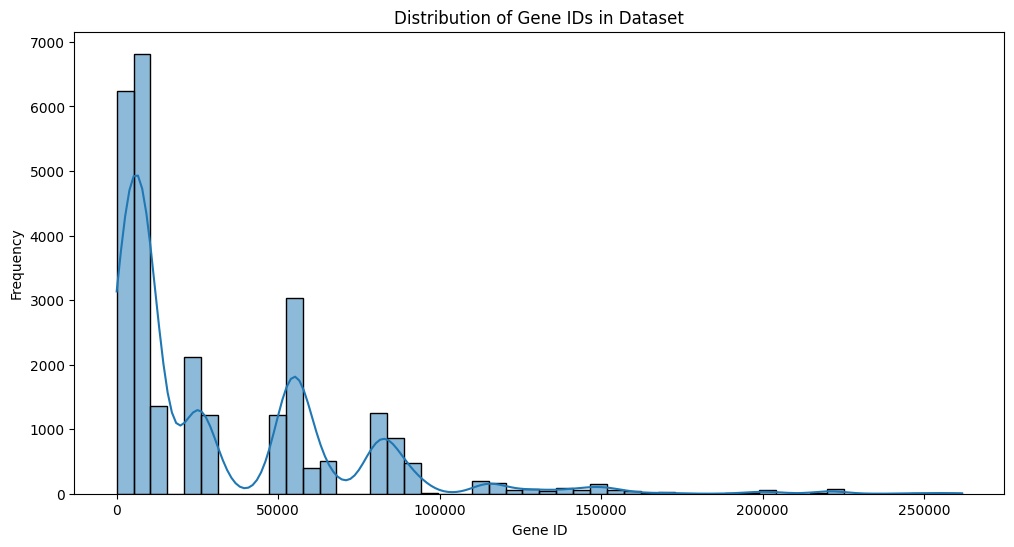

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned["GENE"], bins=50, kde=True)
plt.xlabel("Gene ID")
plt.ylabel("Frequency")
plt.title("Distribution of Gene IDs in Dataset")
plt.show()


In [24]:
df_cleaned.to_csv("cleaned_gene_expression_GSE344.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!
